# Introduction of NLP funadamentals in tensorflow

## Check for GPU

In [1]:
!nvidia-smi -L


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Get the helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-01-24 08:32:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-24 08:32:33 (65.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions from the notebook
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

## Get a text dataset
Kaggle introduction to NLP dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-01-24 08:32:38--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.163.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2023-01-24 08:32:38 (45.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [6]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1,random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# How many example of each class is there
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# How many total samples 
len(train_df),len(test_df)

(7613, 3263)

In [12]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [13]:
# Lets visualize som random training examples

import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f"target: {target}", "(real disaster)" if target > 0 else " not a real disaster")
  print(f"Text,\n{text}\n")
  print("---\n")


target: 0  not a real disaster
Text,
@CortneyMo_ put this in Detroit niggas gone be acting out?? tryna fuck n drown mfs????????loose they buffs in the water?? https://t.co/OAQtjawGxg

---

target: 1 (real disaster)
Text,
Severe Thunderstorm Warning for Oklahoma County until 10:30pm. Radar here: http://t.co/2HV2y2M2oZ #okwx

---

target: 0  not a real disaster
Text,
Vanessa's game has officially blown up. LADIES AND GENTLEMEN...the real show is about to begin. #BB17

---

target: 0  not a real disaster
Text,
Calgary news weather and traffic for August 5 * ~ 90 http://t.co/qBdRYXSGlC http://t.co/VZOd7qFFlv

---

target: 1 (real disaster)
Text,
That rainstorm didn't last nearly long enough

---



### Split data into training and validation sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Use train test split to split train data into training and validation sets
train_sentences,val_sentences,train_labels,val_labels =train_test_split( train_df_shuffled["text"].to_numpy(),
                                          train_df_shuffled["target"].to_numpy(),
                                          test_size=0.1,
                                          random_state=42)

In [16]:
# Check the lengths
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [17]:
# Check the first 10 samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Convert text into numbers

### Text vectoriztion (tokenization)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [19]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentences and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Chose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Orignal text: \n {random_sentence}\
      \n \nVectorized version:")
text_vectorizer([random_sentence])


Orignal text: 
 Afghan Soldier Kills US General America's Highest-Ranking Fatality Since Vietnam http://t.co/SiHQPlUIDW      
 
Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2570, 3399,  418,   69, 1289, 3186,    1,  626,  216, 1743,    1,
           0,    0,    0,    0]])>

In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using Embedding layer

In [25]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length
                             )
embedding

In [26]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Orignal text:\n {random_sentence}\
        \n\nEmbedding version:")
# Embed the random sentences (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Orignal text:
 Burning buildings? Media outrage? http://t.co/pHixZnv1YN        

Embedding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02076139, -0.04592586, -0.02753111, ..., -0.03504014,
         -0.03516299,  0.04160836],
        [-0.02286094, -0.01849132,  0.01119576, ...,  0.0311492 ,
         -0.01455786, -0.03617438],
        [-0.03827783,  0.03698174,  0.00711741, ..., -0.00757188,
         -0.00611087, -0.03109278],
        ...,
        [-0.000386  , -0.0035115 ,  0.04533935, ..., -0.03415614,
         -0.01515077, -0.01061149],
        [-0.000386  , -0.0035115 ,  0.04533935, ..., -0.03415614,
         -0.01515077, -0.01061149],
        [-0.000386  , -0.0035115 ,  0.04533935, ..., -0.03415614,
         -0.01515077, -0.01061149]]], dtype=float32)>

In [27]:
# Check out a single token embedding
sample_embed[0][0], sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-2.07613949e-02, -4.59258556e-02, -2.75311116e-02,  3.57917883e-02,
        -3.18870544e-02,  2.07710266e-03,  1.30348913e-02, -1.80713832e-05,
         5.83254173e-03, -4.70746681e-03, -7.82297924e-03,  1.00104436e-02,
         4.76346351e-02,  1.65184848e-02,  2.71507613e-02,  4.90269773e-02,
         1.35208704e-02, -1.96506623e-02,  2.12527998e-02, -2.48494148e-02,
        -4.63034958e-03, -3.29262167e-02, -3.69247682e-02,  3.89590114e-03,
         2.01729797e-02, -8.58704001e-03, -4.81539965e-02, -3.99833545e-02,
         4.55520637e-02,  4.87050451e-02,  1.41172521e-02,  1.02455616e-02,
         4.80450429e-02,  2.16344111e-02,  4.08924930e-02,  3.27347629e-02,
         4.58853319e-03,  8.53793696e-03,  4.31788675e-02, -1.11481324e-02,
        -2.06332691e-02,  1.41161345e-02,  3.21832411e-02,  2.11725719e-02,
         4.03212197e-02, -2.85799857e-02, -3.10715921e-02, -1.33117437e-02,
        -6.36934116e-03,  2.22456716e-0

## Modeling a text dataset

### Model 0: Getting a baseline 

As with all machine learning modelling experiments its important to create a baseline model

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tftid",TfidfVectorizer()), # Converts words to numbers using tfidf
    ("clf",MultinomialNB()) # Model the text
])

# Fit the pipeline to the training data 
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tftid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
# Evaluate our base line model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achives an accuracy of: {baseline_score}%")

Our baseline model achives an accuracy of: 0.7926509186351706%


In [30]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

### Creating an evaluation function for our model experiments

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [32]:
# Get baseline results
baseline_results = calculate_results(val_labels,baseline_preds)

### Model 1: A simple dense model

In [33]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback
# Create a directory to save Tensorboard callback
SAVE_DIR = "model_logs"

In [34]:
text_vectorizer(train_sentences[0])

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1, 6507,    8,  387,   43, 2956,  978,    0,    0,    0,    0,
          0,    0,    0,    0])>

In [35]:
# Build model with  Functional API
input = tf.keras.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(input) # turns the text into embeded form
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.models.Model(input,output)
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data = (val_sentences,val_labels),
            callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                     experiment_name = "model_1_dense")]
            )


Saving TensorBoard log files to: model_logs/model_1_dense/20230124-083241
Epoch 1/5
215/215 [==============================] - 5s 19ms/step - loss: 0.6116 - accuracy: 0.6860 - val_loss: 0.5356 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4402 - accuracy: 0.8192 - val_loss: 0.4696 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3462 - accuracy: 0.8606 - val_loss: 0.4586 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2839 - accuracy: 0.8918 - val_loss: 0.4617 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2372 - accuracy: 0.9113 - val_loss: 0.4793 - val_accuracy: 0.7861


In [36]:
# Check the results 
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7861


[0.4793207347393036, 0.7860892415046692]

In [37]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [38]:
# Look at the first ten predictions
model_1_pred_probs[:10]

array([[0.36428186],
       [0.6865169 ],
       [0.99777216],
       [0.12071165],
       [0.10896276],
       [0.93203807],
       [0.8921798 ],
       [0.99385005],
       [0.96329015],
       [0.26329306]], dtype=float32)

In [39]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [40]:
# Calculate model_1 results
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7907394181632303,
 'recall': 0.7860892388451444,
 'f1': 0.7831536805930754}

## Visualize our models learned embedding

In [41]:
# Get the vocabulary from the text vectorization layer
word_in_vocab = text_vectorizer.get_vocabulary()
len(word_in_vocab),word_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [42]:
# Model 1 summary
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [43]:
# Get the weight metrix of embedding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [44]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# # Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurent Neural Network

### Model 2: LSTM

In [45]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [46]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [47]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230124-083325
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


In [48]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 4ms/step


((762, 1), array([[0.00712611],
        [0.78736895],
        [0.99963766],
        [0.05679163],
        [0.0025822 ],
        [0.9996238 ],
        [0.921702  ],
        [0.9997993 ],
        [0.99949545],
        [0.6645747 ]], dtype=float32))

In [49]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [50]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.06561679790026,
 'precision': 0.7510077975908164,
 'recall': 0.7506561679790026,
 'f1': 0.7489268622514025}

In [51]:
# Compare model 2 to baseline
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU

In [52]:
# Build an RNN using a GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(100,activation="tanh")(x)
# x = layers.GRU(64,return_sequences=True)(x)
# x = layers.LSTM(64,return_sequences = True)(x)
# x = layers.GRU(64)(x)
# x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")


In [53]:
# Model summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 100)               69000     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,349,101
Trainable params: 1,349,101
Non-trainable params: 0
_____________________________________________

In [54]:
# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.00001),
                metrics = ["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [55]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU"),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience =1)])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230124-083409
Epoch 1/10
215/215 [==============================] - 8s 27ms/step - loss: 0.6678 - accuracy: 0.6933 - val_loss: 0.6656 - val_accuracy: 0.6391
Epoch 2/10
215/215 [==============================] - 5s 25ms/step - loss: 0.6298 - accuracy: 0.7276 - val_loss: 0.6415 - val_accuracy: 0.6562
Epoch 3/10
215/215 [==============================] - 7s 34ms/step - loss: 0.5817 - accuracy: 0.7501 - val_loss: 0.6079 - val_accuracy: 0.6824
Epoch 4/10
215/215 [==============================] - 5s 25ms/step - loss: 0.5043 - accuracy: 0.7933 - val_loss: 0.5525 - val_accuracy: 0.7310
Epoch 5/10
215/215 [==============================] - 6s 26ms/step - loss: 0.3759 - accuracy: 0.8631 - val_loss: 0.4876 - val_accuracy: 0.7808
Epoch 6/10
215/215 [==============================] - 5s 25ms/step - loss: 0.2433 - accuracy: 0.9158 - val_loss: 0.4877 - val_accuracy: 0.7953
Epoch 7/10
215/215 [==============================] - 6s 26ms/step - l

In [56]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.33826673],
       [0.8280845 ],
       [0.9979915 ],
       [0.04510069],
       [0.0417427 ],
       [0.97524107],
       [0.95657897],
       [0.996177  ],
       [0.9885488 ],
       [0.15598887]], dtype=float32)

In [57]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 79.13385826771653,
 'precision': 0.7936442238217675,
 'recall': 0.7913385826771654,
 'f1': 0.7893870954882566}

### Model 4 : Bidirectional RNN

In [59]:
# Build a bidirectional RNN
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [60]:
# Get Summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [61]:
# Compile the model 
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [62]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230124-083453
Epoch 1/5
215/215 [==============================] - 18s 54ms/step - loss: 0.2032 - accuracy: 0.9235 - val_loss: 0.5625 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1536 - accuracy: 0.9416 - val_loss: 0.6078 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1233 - accuracy: 0.9521 - val_loss: 0.7475 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1058 - accuracy: 0.9615 - val_loss: 0.8384 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0893 - accuracy: 0.9673 - val_loss: 0.8000 - val_accuracy: 0.7769


In [63]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 10ms/step


array([[4.4926476e-02],
       [5.0216430e-01],
       [9.9991912e-01],
       [4.4777371e-02],
       [2.8262596e-04],
       [9.9910223e-01],
       [5.5931586e-01],
       [9.9998623e-01],
       [9.9989969e-01],
       [5.9393132e-01]], dtype=float32)

In [64]:
# Convert preds to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [65]:
# calculate the results of our bidiretional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.69028871391076,
 'precision': 0.7802261455878201,
 'recall': 0.7769028871391076,
 'f1': 0.7742088128407028}

## Convolution Neural Networks for Text (and other types of sequences)

### Model_5 Conv_1D

In [66]:
# Test out our embedding layer , conv1D layer and max pooling 
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation="relu",
                        padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [67]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="valid",strides=1)(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv_1D")

# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Model_5 summary
model_5.summary()

Model: "model_5_Conv_1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)             

In [68]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,"conv_1d")])

Saving TensorBoard log files to: model_logs/conv_1d/20230124-083623
Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.1531 - accuracy: 0.9457 - val_loss: 0.7306 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1030 - accuracy: 0.9615 - val_loss: 0.8695 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0806 - accuracy: 0.9685 - val_loss: 0.9405 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0699 - accuracy: 0.9727 - val_loss: 1.0220 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0601 - accuracy: 0.9752 - val_loss: 1.0961 - val_accuracy: 0.7730


In [69]:
# Make some predictions with our conv1d model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[1.6300790e-01],
       [5.9585464e-01],
       [9.9990821e-01],
       [5.5962201e-02],
       [2.0684017e-07],
       [9.9623543e-01],
       [9.8263526e-01],
       [9.9974298e-01],
       [9.9999785e-01],
       [6.3841349e-01]], dtype=float32)

In [70]:
# Convert model_5 pred_probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)

In [72]:
model_5_results

{'accuracy': 77.29658792650919,
 'precision': 0.77365375135567,
 'recall': 0.7729658792650919,
 'f1': 0.77144803030122}

## Model 6 TensorFlowHub USE Feature extractor 

In [73]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal setence encoder on a sentence it converts it into numbers."])
print(embed_samples[0].shape)


(512,)


it converts the input to 512 feature vector

In [74]:
from numpy import dtype
# Create a keras layer using USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype = tf.string,
                                        trainable=False,
                                        name="USE"
                                        )

In [75]:
# Create model using sequential api
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation = "relu"),
    layers.Dense(1,activation="sigmoid")
],name = "model_6_USE")

# Compile 
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [76]:
# Train a classifier on top of USE pretrained model
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230124-083703
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.5033 - accuracy: 0.7838 - val_loss: 0.4466 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4142 - accuracy: 0.8142 - val_loss: 0.4350 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3994 - accuracy: 0.8222 - val_loss: 0.4308 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3920 - accuracy: 0.8269 - val_loss: 0.4265 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3858 - accuracy: 0.8291 - val_loss: 0.4281 - val_accuracy: 0.8136


In [77]:
# Make predictions with USE tf hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 0s 7ms/step


array([[0.15000705],
       [0.7415104 ],
       [0.9891435 ],
       [0.18855079],
       [0.7128076 ],
       [0.68305814],
       [0.9782855 ],
       [0.9784113 ],
       [0.93079054],
       [0.08289284]], dtype=float32)

In [78]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [79]:
# Calculate model 6 performance metric
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

In [80]:
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7907394181632303,
 'recall': 0.7860892388451444,
 'f1': 0.7831536805930754}

## Model 7 tf hub pretrained USE but on 10 percent of data

In [81]:
# # Note this caused data leakage <---->
# # Create subsets of ten precent of the training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent),len(train_labels_10_percent)


In [82]:
# Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [83]:
import numpy as np

In [84]:
# Check the number of each label in the updated training dataset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [85]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [86]:
# Lets build a model same as model 6
model_7  = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Get a summary (will be the same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [87]:
# Fit the model to the ten percent data
model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs = 5,
            validation_data = (val_sentences,val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "tf_hub_sentence_encoder_10_percent_correct")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct/20230124-083720
Epoch 1/5
22/22 [==============================] - 3s 35ms/step - loss: 0.6694 - accuracy: 0.6409 - val_loss: 0.6534 - val_accuracy: 0.6627
Epoch 2/5
22/22 [==============================] - 0s 17ms/step - loss: 0.6032 - accuracy: 0.7869 - val_loss: 0.5996 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 0s 16ms/step - loss: 0.5273 - accuracy: 0.8248 - val_loss: 0.5400 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4629 - accuracy: 0.8219 - val_loss: 0.5056 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 1s 23ms/step - loss: 0.4198 - accuracy: 0.8365 - val_loss: 0.4888 - val_accuracy: 0.7848


In [88]:
# Make predictions with the model trained on 10 percent of the data 
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 7ms/step


array([[0.19753323],
       [0.55339414],
       [0.9090062 ],
       [0.3773055 ],
       [0.5622214 ],
       [0.686348  ],
       [0.8723867 ],
       [0.8247616 ],
       [0.85524803],
       [0.14321713]], dtype=float32)

In [89]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [90]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 78.4776902887139,
 'precision': 0.7862392297712013,
 'recall': 0.7847769028871391,
 'f1': 0.7830611097687449}

In [91]:
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

there is data leakage from validation to training sets

## Comparing the performance of each of our models

In [92]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline":baseline_results,
                                  "simple_dense":model_1_results,
                                  "lstm":model_2_results,
                                  "GRU":model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d":model_5_results,
                                  "tf_hub_use_encoder":model_6_results,
                                  "tf_hub_use_encoder_10_percent":model_7_results})

In [93]:
all_model_results.transpose()

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.790739,0.786089,0.783154
lstm,75.065617,0.751008,0.750656,0.748927
GRU,79.133858,0.793644,0.791339,0.789387
bidirectional,77.690289,0.780226,0.776903,0.774209
conv1d,77.296588,0.773654,0.772966,0.771448
tf_hub_use_encoder,81.364829,0.816066,0.813648,0.812062
tf_hub_use_encoder_10_percent,78.477690,0.786239,0.784777,0.783061


In [94]:
# Reduce the accuracy to the same scale as other metrics
all_model_results = all_model_results.transpose()
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790739,0.786089,0.783154
lstm,0.750656,0.751008,0.750656,0.748927
GRU,0.791339,0.793644,0.791339,0.789387
bidirectional,0.776903,0.780226,0.776903,0.774209
conv1d,0.772966,0.773654,0.772966,0.771448
tf_hub_use_encoder,0.813648,0.816066,0.813648,0.812062
tf_hub_use_encoder_10_percent,0.784777,0.786239,0.784777,0.783061


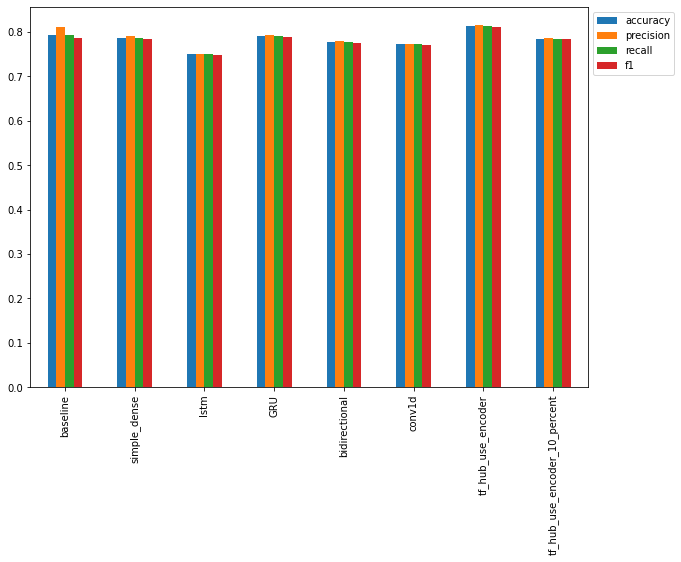

In [97]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

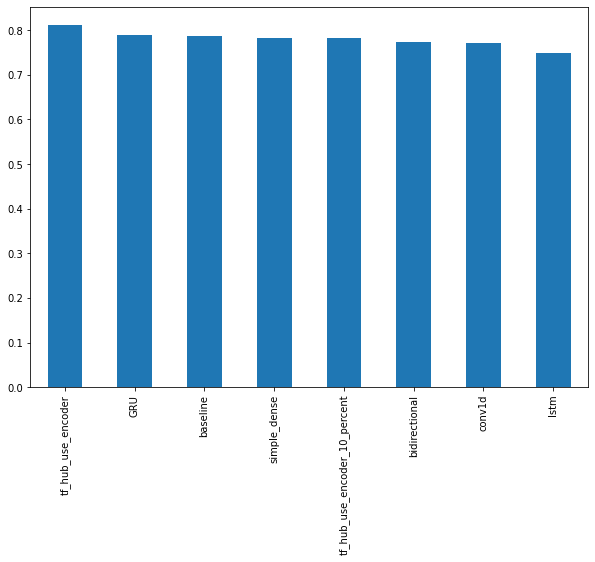

In [98]:
# Sort model results by f1 score
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

## Uploading our model training logs to tensorboard.dev
we can further inspect our models performance using Tensorflow.dev: https://tensorboard.dev/

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs/ \
 --name "NLP Modelling Experiments ZTM TF Course Video" \
 --description "Comparing different types of model architecture on the kaggle disaster detection dataset" \
 --one_shot # Exits the uploader when uploading is completed 

In [101]:
# See the previous experiments you have run
!tensorboard dev list

2023-01-24 09:03:56.485740: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/xP4OL6eWTmmHYirGNTVggg/
	Name                 NLP Modelling Experiments ZTM TF Course Video
	Description          Comparing different types of model architecture on the kaggle disaster detection dataset
	Id                   xP4OL6eWTmmHYirGNTVggg
	Created              2023-01-24 08:58:25 (5 minutes ago)
	Updated              2023-01-24 08:58:32 (5 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              222
	Tensor bytes         0
	Binary object bytes  3247907
Total: 1 experiment(s)


In [102]:
# If you need to delete an experiment
! tensorboard dev  delete --experiment_id xP4OL6eWTmmHYirGNTVggg

2023-01-24 09:04:50.464412: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Deleted experiment xP4OL6eWTmmHYirGNTVggg.


## Saving and loading a trained model
There are two main formats for saving the model in Tensorflow :
1. The HDF5 format.
2. The "SavedModel" format (this is the default when using Tensorflow)


In [103]:
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

In [104]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [105]:
# Load model with custom HUB layer
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects = {"KerasLayer": hub.KerasLayer} )

In [106]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 17ms/step - loss: 0.4281 - accuracy: 0.8136


[0.4281088411808014, 0.8136482834815979]

Now lets save to saved model format

In [107]:
# Save TF Hub Sentences Encoder model to Saved Model Format
model_6.save("model_6_SaveModel_format")

In [109]:
# Load in a model from saved model format
loaded_model_6_savedmodel_format = tf.keras.models.load_model("model_6_SaveModel_format") 

In [110]:
# Evaluate model in savedmodel format
loaded_model_6_savedmodel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 16ms/step - loss: 0.4281 - accuracy: 0.8136


[0.4281088411808014, 0.8136482834815979]

## Finding the most wrong examples

In [112]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-01-24 09:29:46--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   206MB/s    in 4.7s    

2023-01-24 09:29:51 (194 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [113]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [114]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

24/24 [==============================] - 1s 16ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [115]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [116]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835455
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [117]:
most_wrong.tail() # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [118]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769820332527161
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.835454523563385
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.8148159384727478
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [119]:
# Check the false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")
     

Target: 1, Pred: 0.0, Prob: 0.06730345636606216
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507584661245346
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054596997797489166
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963729530572891
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.04391849786043167
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.0

## Making predictions on the test dataset

In [120]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")
     

1/1 [==============================] - 0s 68ms/step
Pred: 0, Prob: 0.1713566780090332
Text:
We The Free Hailstorm Maxi http://t.co/Cnn1nXXNwc

-----

1/1 [==============================] - 0s 41ms/step
Pred: 1, Prob: 0.7538722157478333
Text:
Donate to help Myanmar Flooding victims http://t.co/fuRVRES9Ks

-----

1/1 [==============================] - 0s 31ms/step
Pred: 0, Prob: 0.040232833474874496
Text:
Need to drown in ice cream??

-----

1/1 [==============================] - 0s 26ms/step
Pred: 1, Prob: 0.618428111076355
Text:
JPLocalFirst RT eliotschool: Yesterday's #hailstorm in #Boston. Wow. Thunder lightning. Artful awesome. http://t.co/YsvE1SEAko

-----

1/1 [==============================] - 0s 27ms/step
Pred: 0, Prob: 0.2454586923122406
Text:
VINTAGE EAGLE 4' OIL CAN OILER FOR WWII JEEP MB GPW MILITARY  VEHICLE TOOL KIT http://t.co/9tpFRN725P http://t.co/hVH6b3wOLg

-----

1/1 [==============================] - 0s 26ms/step
Pred: 0, Prob: 0.1234620064496994
Text:
@rewind_music

## The speed score trade off

In [125]:
# Lets make a function to measure the time of predictions
import time
def pred_timer(model,samples):
  """
  Times how long a model takes to make predictions on samples
  """
  start_time  = time.perf_counter() # get start time
  model.predict(samples) # Make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time,time_per_pred

In [126]:
# Calculate TF HUB Sentence Encoder time per pred
model_6_total_pred_time,model_6_time_per_pred = pred_timer(model = model_6_pretrained,
                                                           samples = val_sentences)
model_6_total_pred_time,model_6_time_per_pred

24/24 [==============================] - 0s 8ms/step


(0.34842884999943635, 0.0004572557086606776)

In [127]:
# Calculate our baseline model time per pred 
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.06946209500074474, 9.115760498785398e-05)

In [130]:
# Get results for model 6
model_6_pretrained_results = calculate_results(y_true = val_labels,
                                               y_pred = model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

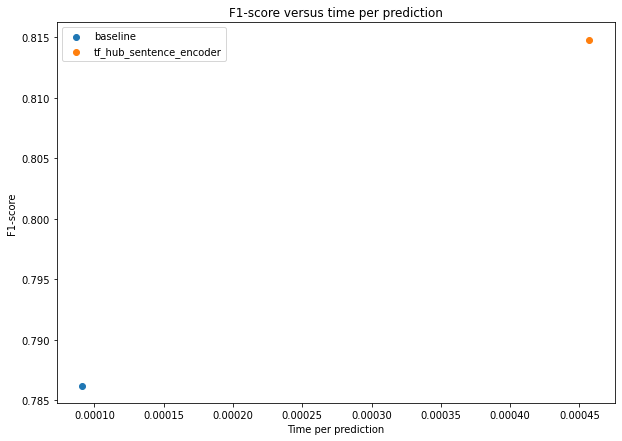

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");
     